In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns


x = pd.read_csv("YouTube_Dataset_Processed.csv")

In [2]:
# Retirando a coluna com o número de visualizações para servir como Y

y = x.pop('Visualizações')

# Mostrando os 10 primeiros elementos e seus targets

print(x.head(10))
print(y.head(10))

   Inscritos  Duração  Tema  Formato  Data
0     135000     5615     7        5  2135
1     145000      321     9        3  1019
2     157000     1387     5        5   990
3     135000     9081     7        5  1024
4     358000      265     9        4    67
5     358000      243     9        4    88
6     358000      162     9        4  2318
7     358000      202     9        4   799
8     128000      406     6        5  1938
9     153000      122     6        5  1546
0    1
1    5
2    3
3    4
4    3
5    3
6    4
7    5
8    4
9    4
Name: Visualizações, dtype: int64


In [3]:
# Função para mostrar a matriz de confusão

def plot_confusion_matrix(cm, cmap=plt.cm.Greys):

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '1'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [4]:
# Gambiarra para tirar o header

x.to_csv(r'C:\Users\Acer\Dropbox\UFABC\2019.3\SI\YouTube_Dataset_StandardScaler.csv', index = None, header = None)
x = pd.read_csv("YouTube_Dataset_StandardScaler.csv", header = None)

# Mostrando três primeiros e três últimos elementos antes do Standard Scaler

print(x.head(3))
print(x.tail(3))

# Mostrando três primeiros e três últimos elementos depois do Standard Scaler

x = StandardScaler().fit_transform(x)
print(x)

# Exportando o Dataset depois do Standard Scaler
df_x = pd.DataFrame(x)
df_x.to_csv(r'C:\Users\Acer\Dropbox\UFABC\2019.3\SI\YouTube_Dataset_StandardScaler.csv', index = None, header = True)

# Dividindo os dados em 80% treino e 20% teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

        0     1  2  3     4
0  135000  5615  7  5  2135
1  145000   321  9  3  1019
2  157000  1387  5  5   990
          0    1  2  3     4
225  135000  135  7  5   937
226  145000  246  7  3  2284
227  157000  956  5  5   739
[[-0.60662354  2.35051836 -0.15235691  0.71960522  1.22248773]
 [-0.47789107 -0.30427975  1.0055556  -1.76630372 -0.20124309]
 [-0.3234121   0.23029048 -1.31026942  0.71960522 -0.23823968]
 ...
 [-0.60662354 -0.39755373 -0.15235691  0.71960522 -0.30585414]
 [-0.47789107 -0.34189022 -0.15235691 -1.76630372  1.41257365]
 [-0.3234121   0.01415562 -1.31026942  0.71960522 -0.55845154]]


Acurácia usando Multilayer Perceptron com 50 camadas: 0.5


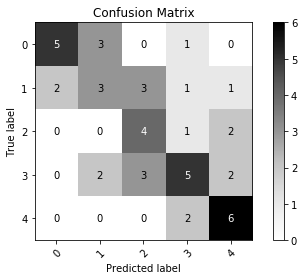

In [5]:
# Classificação usando Multilayer Perceptron

ANN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50))
ANN.fit(x_train, y_train)
y_pred = ANN.predict(x_test)

print("Acurácia usando Multilayer Perceptron com 50 camadas:", round(accuracy_score(y_test, y_pred),2))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

plt.show()

#for i in range (len(y_test)):
#    print("Real:", y_test.iloc[i]," Teste:", y_pred[i])

Acurácia usando KNN com n=5: 0.41


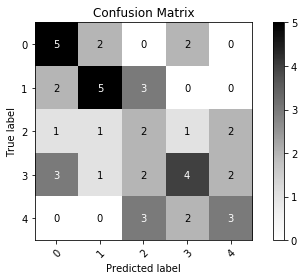

In [6]:
# Classificação usando KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print("Acurácia usando KNN com n=5:", round(accuracy_score(y_test, y_pred),2))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

plt.show()

Acurácia usando Decision Tree: 0.48


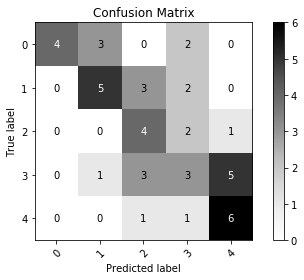

In [7]:
# Classificação usando Decision Tree

dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Acurácia usando Decision Tree:", round(accuracy_score(y_test, y_pred),2))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

plt.show()

Acurácia usando Randon Forest com n = 10: 0.57


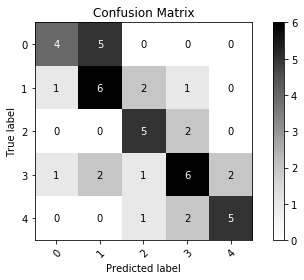

In [8]:
# Classificação usando Random Forest

rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Acurácia usando Random Forest com n = 10:", round(accuracy_score(y_test, y_pred),2))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

plt.show()

Acurácia usando Naive Bayes: 0.26


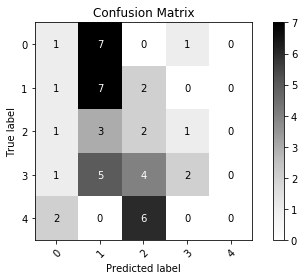

In [9]:
# Classificação usando Naive Bayes

gnb = GaussianNB() 
gnb.fit(x_train, y_train) 
y_pred = gnb.predict(x_test)
print("Acurácia usando Naive Bayes:", round(accuracy_score(y_test, y_pred),2))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

plt.show()

Acurácia usando SVM com kernel linear: 0.26


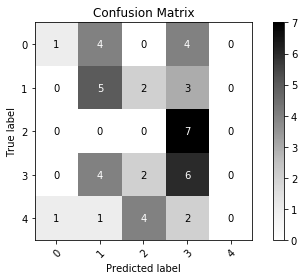

In [10]:
# Classificação usando SVM com kernel linear

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Acurácia usando SVM com kernel linear:", round(accuracy_score(y_test, y_pred),2))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

plt.show()

Acurácia usando SVM com kernel RBF: 0.24


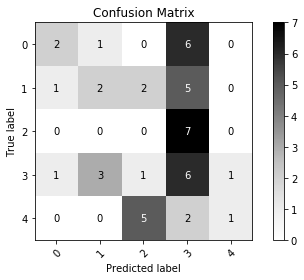

In [11]:
# Classificação usando SVM com kernel RBF

clf = svm.SVC(gamma='scale')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Acurácia usando SVM com kernel RBF:", round(accuracy_score(y_test, y_pred),2))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

plt.show()

In [12]:
methods = {
    'Multilayer Perceptron': MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50)),
    'K-nearest neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42),
    'Naive Bayes': GaussianNB(),
    'SVM Linear': svm.SVC(kernel='linear'),
    'SVM RBF': svm.SVC(gamma='scale')
}

accs = []

# Refazendo todas as classificações com cross validation de cv = 10 e mostrando a acurácia média

for m in methods:
    print(m)
    cv = cross_val_score(methods[m], x, y, cv=10)
    acc = round(np.median(cv),2)
    print("Acurácia:", acc)
    accs.append([m, acc])

Multilayer Perceptron
Acurácia: 0.48
K-nearest neighbors
Acurácia: 0.44
Decision Tree
Acurácia: 0.46
Random Forest
Acurácia: 0.49
Naive Bayes
Acurácia: 0.3
SVM Linear
Acurácia: 0.32
SVM RBF
Acurácia: 0.45


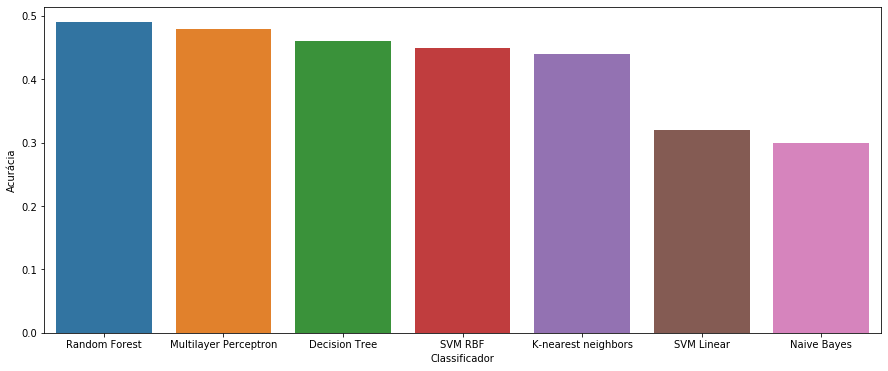

In [13]:
# Plotando um gráfico de barras com os resultados

df_accs = pd.DataFrame(accs, columns=['Classificador', 'Acurácia'])
df_accs = df_accs.sort_values(by="Acurácia", ascending=False)
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='Classificador', y='Acurácia', data=df_accs)